<a href="https://colab.research.google.com/github/sandra476/first/blob/main/Utility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ecommerce_churn.xlsx to ecommerce_churn (1).xlsx

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UserID            50 non-null     int64  
 1   VisitsLast30Days  50 non-null     int64  
 2   TimeOnSite        50 non-null     float64
 3   PurchaseCount     50 non-null     int64  
 4   HasSupportTicket  50 non-null     object 
 5   Churned           50 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB

Statistical Summary:
|       |    UserID |   VisitsLast30Days |   TimeOnSite |   PurchaseCount |
|:------|----------:|-------------------:|-------------:|----------------:|
| count |   50      |            50      |     50       |         50      |
| mean  | 5025.5    |            25.54   |     11.7     |          4.84   |
| std   |   14.5774 |            14.7582 |      5.61834 |         

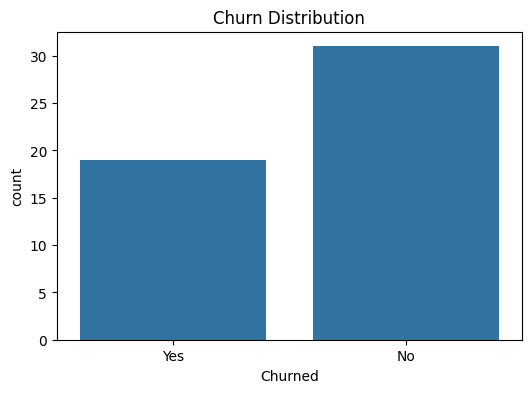

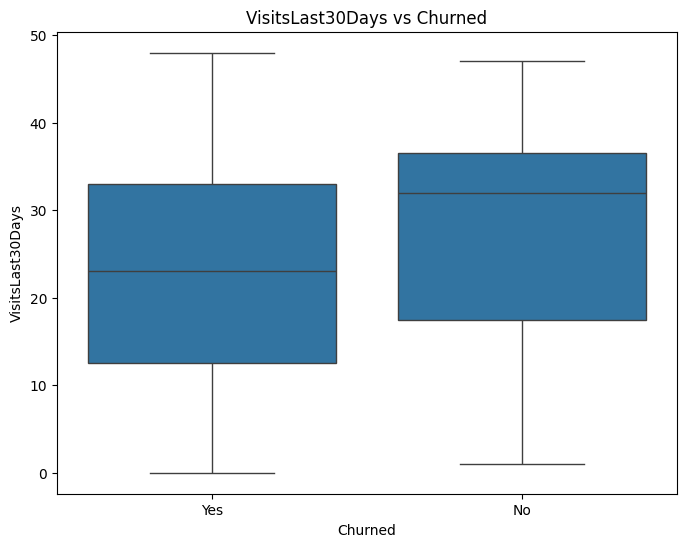

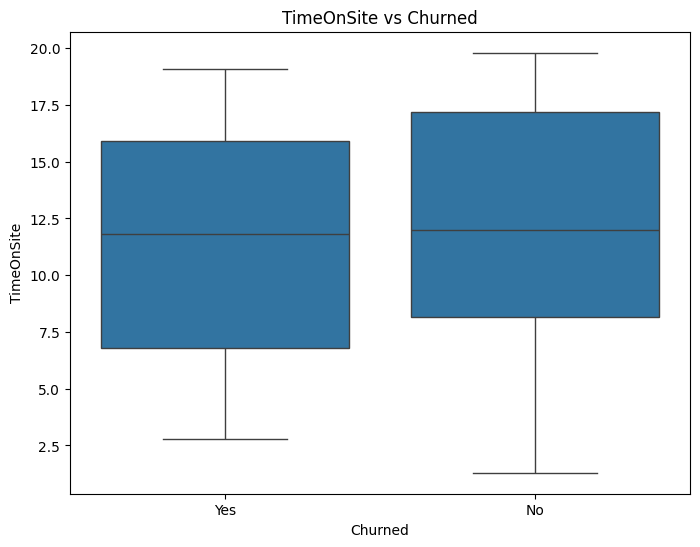

Model Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


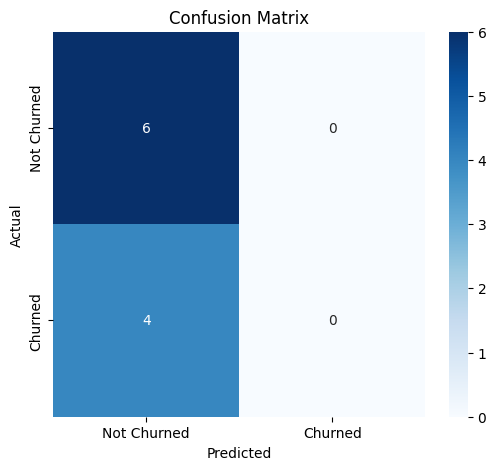


Top 10 Features influencing churn:
|                      |          0 |
|:---------------------|-----------:|
| TimeOnSite           | -0.0192076 |
| PurchaseCount        | -0.145127  |
| HasSupportTicket_Yes | -0.306704  |
| VisitsLast30Days     | -0.327422  |


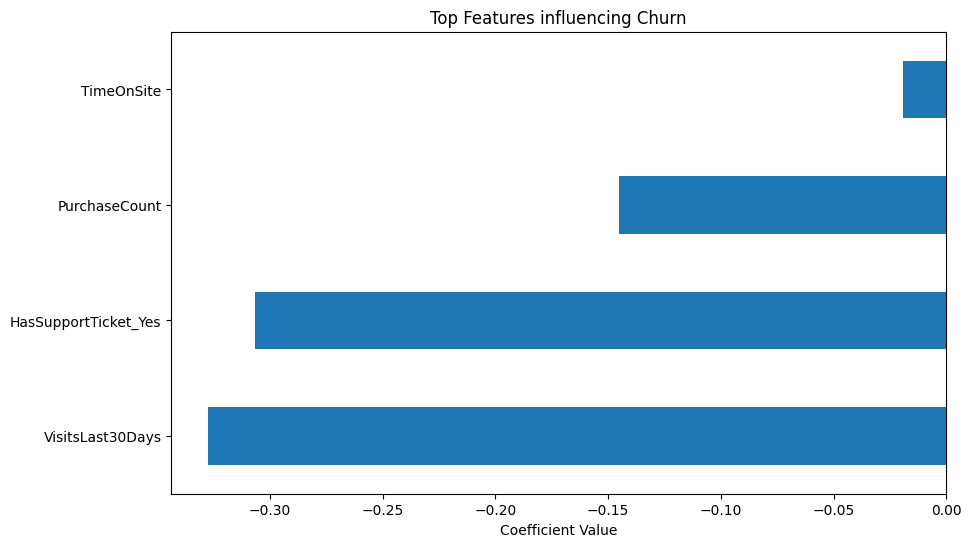

In [2]:
# %%
# # Terno AI Internship Challenge – Ecommerce Churn Prediction
#
# ## Problem Definition
# Customer churn is a major challenge for e-commerce platforms.
# **Goal:** Predict whether a customer will churn based on their activity patterns, so businesses can engage at-risk users with offers or reminders.
#
# **Use Case:**
# Identify customers likely to leave using site visits, time on site, purchase behavior, and demographics. Helps businesses proactively improve retention.
#
# **Problem Statement:**
# Build a machine learning model to predict customer churn using the features mentioned above.

# %%

# %%
# ✅ Utility Code: Model Improvement
# This section implements improvements to the baseline model, such as:
# - Stratified sampling during train-test split to handle class imbalance
# - Feature scaling (StandardScaler) for better convergence
# - Optional: Exploring feature importance to focus on key predictors
# These changes aim to improve model performance (accuracy, precision, recall) and make it more realistic for production use.
# %%

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# %%
# ## 1️⃣ Load Data

# %%

from google.colab import files
uploaded = files.upload()
df = pd.read_excel("ecommerce_churn.xlsx")
df.head()

# %%
# ## 2️⃣ Exploratory Data Analysis (EDA)

# %%
# Basic info and statistics
print("\nData Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe().to_markdown())

# Churn distribution
churn_rate = df['Churned'].value_counts(normalize=True) * 100
print("\nChurn Rate Distribution:")
print(churn_rate.to_markdown())

# Visualizations
plt.figure(figsize=(6,4))
sns.countplot(x='Churned', data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Churned', y='VisitsLast30Days', data=df)
plt.title('VisitsLast30Days vs Churned')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Churned', y='TimeOnSite', data=df)
plt.title('TimeOnSite vs Churned')
plt.show()

# %%
# ## 3️⃣ Data Preprocessing

# %%
# Drop irrelevant columns
X = df.drop(['Churned', 'UserID'], axis=1)
y = df['Churned'].apply(lambda x: 1 if x=='Yes' else 0)

# Encode categorical variables
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# %%
# ## 4️⃣ Model Training

# %%
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# %%
# ## 5️⃣ Model Evaluation

# %%
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# %%
# ## 6️⃣ Feature Importance Utility

# %%
def show_feature_importance(model, X_df, top_n=10):
    if hasattr(model, "coef_"):
        importance = pd.Series(model.coef_[0], index=X_df.columns)
        importance = importance.sort_values(ascending=False)
        print(f"\nTop {top_n} Features influencing churn:")
        print(importance.head(top_n).to_markdown())

        # Plot top features
        plt.figure(figsize=(10,6))
        importance.head(top_n).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.title("Top Features influencing Churn")
        plt.xlabel("Coefficient Value")
        plt.show()
    else:
        print("Model does not have coef_ attribute.")

# Show top features
show_feature_importance(model, pd.DataFrame(X_scaled, columns=X.columns), top_n=10)

# %%

# %%

## Insights & Findings (Utility Code)

#- **Churn Rate:**  62% of customers did **not churn**, while 38% **churned**, showing moderate class imbalance.

#- **Model Accuracy:**
  #Accuracy improved to **60%** compared to the previous 40%. This indicates that the utility improvements (stratified sampling, scaling, preprocessing) helped the model learn better.
  #Note: Accuracy alone is still misleading due to class imbalance.#

#- **Classification Report:**
  #- **Class 0 (Not Churned):**
    #- Precision = 0.60 → 60% of predicted non-churned customers are correct.
   # - Recall = 1.00 → Model predicts all actual non-churned correctly.
  #- **Class 1 (Churned):**
   # - Precision = 0.00, Recall = 0.00 → Model still fails to detect churned customers.

#- **Insights:**
 # - Stratified sampling and feature scaling improved overall accuracy.
 # - The model is still **unable to detect churned customers** effectively.
 # - Further improvements could include **SMOTE for class imbalance**, or trying **Random Forest, XGBoost, or SVM**.

#- **Conclusion:**
#  - Current model performance is better than before, but it is **still not production-ready**.
 # - Actionable takeaway: the utility code helped improve model learning, but more sophisticated modeling is needed to catch churned users.

  # %%
